In [3]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
%matplotlib inline

In [9]:
test_path = os.path.join(os.getcwd(), 'data', 'faces_test_data.csv')
test = pd.read_csv(test_path, delimiter = ',')
train_path = os.path.join(os.getcwd(), 'data', 'faces_train_data.csv')
train = pd.read_csv(train_path, delimiter = ',')

In [29]:
smiling = train[train['smiling'] == 1].drop(['smiling'], axis=1)
sad = train[train['smiling'] != 1].drop(['smiling'], axis=1)
avg_smiling = smiling.mean(axis=0)
avg_sad = sad.mean(axis=0)

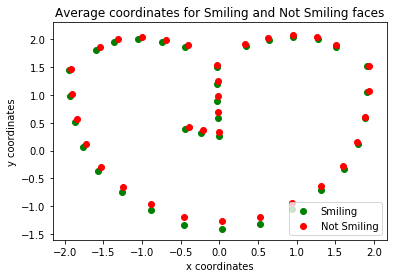

In [66]:
smiling_xs = []
smiling_ys = []
for even in range(0,68,2):
    smiling_xs.append(avg_smiling[even])
for odd in range(1,69,2):
    smiling_ys.append(avg_smiling[odd])
sad_xs = []
sad_ys = []
for even in range(0,68,2):
    sad_xs.append(avg_sad[even])
for odd in range(1,69,2):
    sad_ys.append(avg_sad[odd])
fig, ax = plt.subplots()
ax.scatter(smiling_xs, smiling_ys, label="Smiling", color="green")
ax.scatter(sad_xs, sad_ys, label="Not Smiling", color="red")
ax.set_xlabel("x coordinates")
ax.set_ylabel("y coordinates")
ax.set_title("Average coordinates for Smiling and Not Smiling faces")
plt.legend(loc=4)

In [72]:
test_X = test.drop(['smiling'], axis=1)
train_X = train.drop(['smiling'], axis=1)
test_y = test['smiling']
train_y = train['smiling']

In [94]:
dc1 = DecisionTreeClassifier(random_state=2001, max_depth=2)
dc1.fit(train_X, train_y)
train_pred_1 = dc1.predict(train_X)
train_acc_1 = accuracy_score(train_y, train_pred_1)
train_acc_1

0.7947916666666667

In [101]:
ddc1 = DecisionTreeClassifier(random_state=2001, max_depth=2)
ddc1.fit(test_X, test_y)
test_pred_1 = ddc1.predict(test_X)
test_acc_1 = accuracy_score(test_y, test_pred_1)
print(test_acc_1)

0.7641666666666667


In [97]:
dc2 = DecisionTreeClassifier(random_state=2001, max_depth=8)
dc2.fit(train_X, train_y)
train_pred_2 = dc2.predict(train_X)
train_acc_2 = accuracy_score(train_y, train_pred_2)
train_acc_2

0.9335416666666667

In [98]:
dc2.fit(test_X, test_y)
test_pred_2 = dc2.predict(test_X)
test_acc_2 = accuracy_score(test_y, test_pred_2)
print(test_acc_2)

0.9816666666666667


In [99]:
dc3 = DecisionTreeClassifier(random_state=2001, max_depth=20)
dc3.fit(train_X, train_y)
train_pred_3 = dc3.predict(train_X)
train_acc_3 = accuracy_score(train_y, train_pred_3)
train_acc_3

1.0

In [100]:
dc3.fit(test_X, test_y)
test_pred_3 = dc3.predict(test_X)
test_acc_3 = accuracy_score(test_y, test_pred_3)
print(test_acc_3)

1.0


In [ ]:
alls = dc1.feature_importances_
imps = np.where(alls > 0) # 67 = 0.63972219,100 = 0.36027781

In [154]:
alls2 = dc2.feature_importances_
imps2 = np.where(alls2 == np.max(alls2))
imps2 # attr 67 = y33
sorteds = np.flip(np.sort(alls2))
top3 = [sorteds[0], sorteds[1], sorteds[2]]
things0 = np.where(alls2 == top3[0])
things1 = np.where(alls2 == top3[1])
things2 = np.where(alls2 == top3[2])

(array([67], dtype=int64),) (array([100], dtype=int64),) (array([97], dtype=int64),)


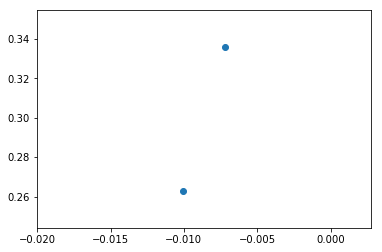

In [176]:
k = sum(dc2.feature_importances_)
k
checkx = [smiling_xs[33], sad_xs[33]]
checky = [smiling_ys[33], sad_ys[33]]
plt.scatter(checkx, checky)

In [160]:
# 67, 100, 97 = y33, x50, y48 = 0.25095553789911235, 0.141332773451923, 0.09116940567866642